# Quantum tomography for n-qubit

Init state: general GHZ
Target state: 1 layer

This case looks like GHZ_initstate but more complex reconstructed circuit

The strategy will be the same but the reconstructed circuit now is more complex, it has more paramter gates and can be arrange like layers. 

<img src="../../images/layer.png" width=500px/>

The barrier splits constructing GHZ state circuit and reconstructed layers:

<img src="../../images/ghz_state_reconstructed.png"/>

In [1]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import qtm.base, qtm.constant, qtm.ansatz

In [2]:
# Init params
num_qubits = 4
num_layers = 3
thetas = np.zeros((num_layers*num_qubits*3))
# theta = np.random.uniform(0, 2*np.pi)
theta = np.pi*3/4
# Init quantum tomography n qubit
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.ansatz.create_ghz_state(qc, theta)
# Reduce loss value in 100 steps
thetas, loss_values = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.ansatz.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.loss.loss_basis,
    optimizer = qtm.optimizer.sgd,
    verbose = 1,
    num_layers = num_layers
)


Step: 100%|██████████| 100/100 [06:41<00:00,  4.01s/it]


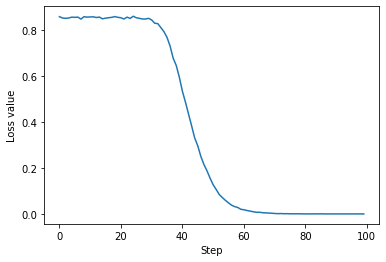

In [3]:
plt.show()
plt.plot(loss_values)
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.show()

In [4]:
# Get statevector from circuit
psi = qiskit.quantum_info.Statevector.from_instruction(qc)
rho_psi = qiskit.quantum_info.DensityMatrix(psi)
psi_hat = qiskit.quantum_info.Statevector(qtm.base.get_u_hat(
    thetas = thetas, 
    create_circuit_func = qtm.ansatz.u_cluster_nlayer_nqubit, 
    num_qubits = qc.num_qubits,
    num_layers = num_layers
))
rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
# Calculate the metrics
trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
print("Trace: ", trace)
print("Fidelity: ", fidelity)

Trace:  0.0030113198158163226
Fidelity:  (0.9999909319529681+2.8362017324545102e-15j)


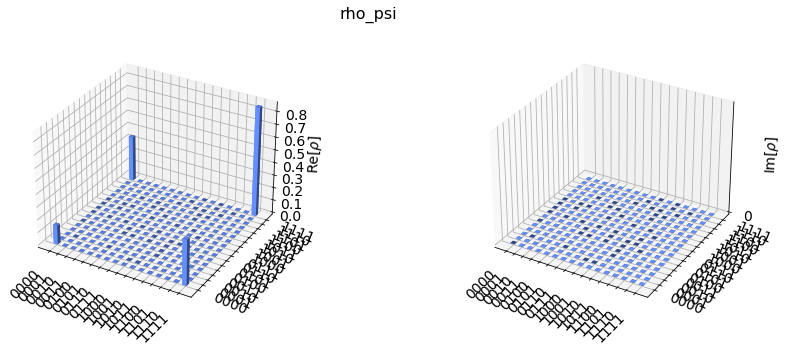

In [5]:
qiskit.visualization.plot_state_city(rho_psi, title = 'rho_psi')

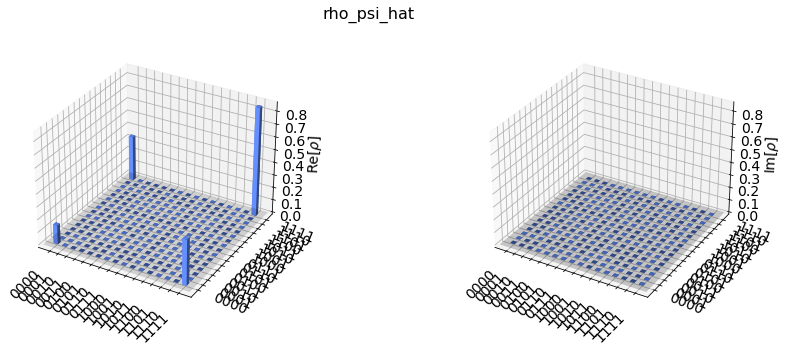

In [6]:
qiskit.visualization.plot_state_city(rho_psi_hat, title = 'rho_psi_hat')